
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [2]:
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [3]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        # Compute mean and std for each feature
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        # Standardize features
        return (X - self.mean) / (self.std + 1e-8)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [4]:
class LinearRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000, lambda_=0.0):
        self.lr = lr
        self.epochs = epochs
        self.lambda_ = lambda_
        self.W = None
        self.b = 0
        self.losses = []

    def predict(self, X):
        return X @ self.W + self.b

    def compute_loss(self, y, y_pred):
        mse = np.mean((y - y_pred) ** 2)
        l2_penalty = self.lambda_ * np.sum(self.W ** 2)
        return mse + l2_penalty

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)

        for _ in range(self.epochs):
            y_pred = self.predict(X)

            # Gradients
            dW = (-2 / n_samples) * (X.T @ (y - y_pred)) + 2 * self.lambda_ * self.W
            db = (-2 / n_samples) * np.sum(y - y_pred)

            # Update
            self.W -= self.lr * dW
            self.b -= self.lr * db

            # Store loss
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)


In [5]:
# Sample dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + 5 + np.random.randn(100) * 2


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


model = LinearRegressionScratch(
    lr=0.05,
    epochs=1000,
    lambda_=0.1   # L2 regularization strength
)

model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)


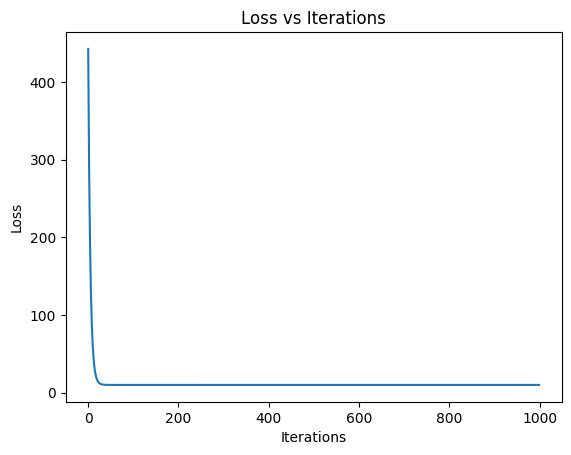

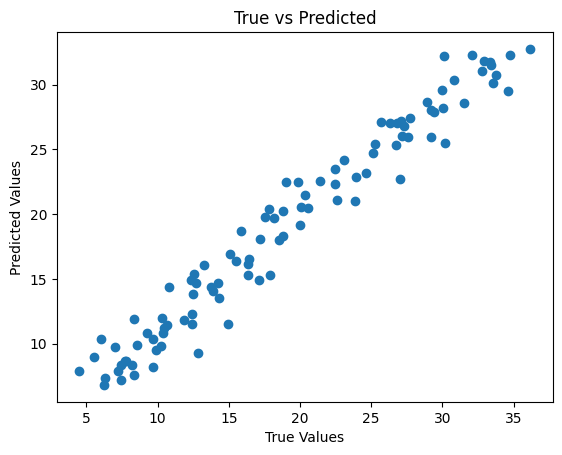

In [ ]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()


plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


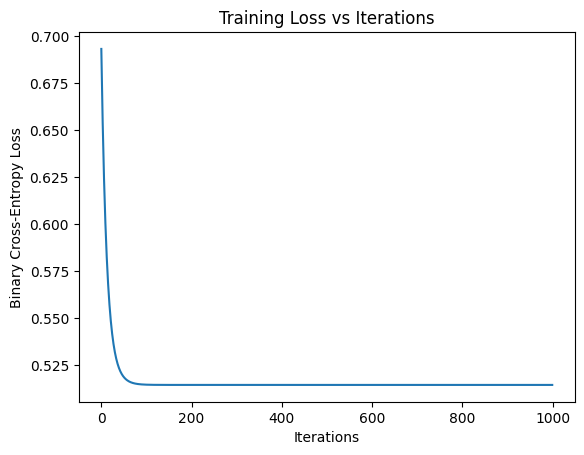

Final Training Accuracy: 0.995


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function 

def sigmoid(z):
    # Numerically stable sigmoid
    return 1 / (1 + np.exp(-z))

class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.W = None
        self.b = 0.0
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0.0

        for _ in range(self.epochs):
            # Linear combination
            z = X @ self.W + self.b

            # Prediction using sigmoid
            y_hat = sigmoid(z)

            # Binary Cross-Entropy Loss
            eps = 1e-8  
            loss = -np.mean(
                y * np.log(y_hat + eps) +
                (1 - y) * np.log(1 - y_hat + eps)
            )

            # Add L2 regularization
            loss += self.l2_lambda * np.sum(self.W ** 2)
            self.losses.append(loss)

            # Gradients
            dW = (1 / n_samples) * (X.T @ (y_hat - y)) \
                 + 2 * self.l2_lambda * self.W
            db = (1 / n_samples) * np.sum(y_hat - y)

            # Gradient descent update
            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict_proba(self, X):
        return sigmoid(X @ self.W + self.b)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)


np.random.seed(42)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Train model
model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model.fit(X, y)

# Plot training loss
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss vs Iterations")
plt.show()

y_pred = model.predict(X)
accuracy = np.mean(y_pred == y)
print("Final Training Accuracy:", accuracy)



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [ ]:
import numpy as np

def kmeans_matrix(M, k, max_iters=100, tol=1e-5, seed=42):

    np.random.seed(seed)

    # Flatten matrix values but keep indices
    values = M.flatten()
    indices = [(i, j) for i in range(M.shape[0]) for j in range(M.shape[1])]

    # Randomly initialize centroids from data values
    centroids = np.random.choice(values, size=k, replace=False).astype(float)

    for it in range(max_iters):
        labels = np.zeros(len(values), dtype=int)

        for idx, val in enumerate(values):
            distances = np.abs(val - centroids)
            labels[idx] = np.argmin(distances)

        # Update step
        new_centroids = np.zeros_like(centroids)
        for c in range(k):
            cluster_vals = values[labels == c]
            if len(cluster_vals) > 0:
                new_centroids[c] = cluster_vals.mean()
            else:
                # Reinitialize empty cluster
                new_centroids[c] = np.random.choice(values)

        # Check convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    
    assignment_table = np.zeros_like(M, dtype=int)
    for idx, (i, j) in enumerate(indices):
        assignment_table[i, j] = labels[idx]

    
    cookbook = {c: [] for c in range(k)}
    for idx, (i, j) in enumerate(indices):
        cookbook[labels[idx]].append((i, j))

    return assignment_table, cookbook, centroids


if __name__ == "__main__":
    M = np.random.randn(5, 6)
    k = 3

    assignment_table, cookbook, centroids = kmeans_matrix(M, k)

    print("Matrix M:\n", M)
    print("\nAssignment Table:\n", assignment_table)
    print("\nCentroids:\n", centroids)
    print("\nCookbook:")
    for key, val in cookbook.items():
        print(f"Cluster {key}: {val}")


Matrix M:
 [[-1.59442766 -0.59937502  0.0052437   0.04698059 -0.45006547  0.62284993]
 [-1.06762043 -0.14237949  0.12029563  0.51443883  0.71161488 -1.12464209]
 [-1.53411417  1.27767682  0.33231401 -0.74848654  1.55115198  0.11567463]
 [ 1.17929718  0.06751848  2.06074792  1.75534084 -0.24896415  0.97157095]
 [ 0.64537595  1.36863156 -0.96492346  0.68605146  1.05842449 -1.75873949]]

Assignment Table:
 [[1 1 0 0 1 0]
 [1 0 0 0 0 1]
 [1 2 0 1 2 0]
 [2 0 2 2 0 2]
 [0 2 1 0 2 1]]

Centroids:
 [ 0.26746265 -1.09359937  1.40285522]

Cookbook:
Cluster 0: [(0, 2), (0, 3), (0, 5), (1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 5), (3, 1), (3, 4), (4, 0), (4, 3)]
Cluster 1: [(0, 0), (0, 1), (0, 4), (1, 0), (1, 5), (2, 0), (2, 3), (4, 2), (4, 5)]
Cluster 2: [(2, 1), (2, 4), (3, 0), (3, 2), (3, 3), (3, 5), (4, 1), (4, 4)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
